<h1>San Francisco Bikeshare</h1>
by Kevin and Jeff







<h2>What are Bikeshares?</h2>

![What are Bikeshares?](https://ww2.kqed.org/news/wp-content/uploads/sites/10/2013/08/bike-share-1.jpg)

<h2>A Starting Point</h2>

![A Starting Point](https://www.kaggle.io/svf/266282/f38a21e1d561640de079ba6a8e0935ea/sf_trips.png)

<h2>Why Do We Care?</h2>
<br/>

![wapo](http://i63.tinypic.com/2hi6kpw.png)

![seattle](http://i63.tinypic.com/wirihy.png)

![nextcity](http://i67.tinypic.com/a2f85i.png)

<h2>Bikeshare User Surveys</h2>
<br/>

![demos](http://i63.tinypic.com/fuwach.png)

![reasons](http://i63.tinypic.com/2ljhw0w.png)

![reasons2](http://i68.tinypic.com/37gom.png)

<h2>Research Question<h2/>
    
<emph><font color = 'blue'>What types of users (clusters) can we identify beyond casual users and subscribers?</font></emph>

<h1>Contextual Data</h1>

We begin by building up a data set capturing the geographic context around each bikeshare station. This context will include several features, including elevation, nearby zone types, nearby tourist attractions, schools, and transit stations, and income characteristics of the area.

![wheel](http://i65.tinypic.com/qn9uko.jpg)

We considered using other data as well, including crime. In the interest of time, we did not include other data sets. However, a dizzying amount of data regarding San Francisco is available at the city's [DataSF site](https://datasf.org/opendata/).

<h2>Stations</h2>

Most of our contextual data is geographic, so we need to know the locations of all bikeshare stations in San Francisco. This dataset is available from Kaggle [here](https://www.kaggle.com/benhamner/sf-bay-area-bike-share/data). It includes the <b>coordinates</b> of each station, which we need to coordinate with other data sets.

In [1]:
import sys 
sys.path.append('./src')
import pandas as pd
import DataLoader

station_features = DataLoader.load_station_locations(filter_to_sf = True)
station_features[:10]

,lat,long
id,,
41,37.795001,-122.399970
42,37.797280,-122.398436
45,37.794231,-122.402923
46,37.795425,-122.404767
47,37.788975,-122.403452
48,37.799953,-122.398525
49,37.790302,-122.390637
50,37.795392,-122.394203
51,37.791464,-122.391034


<h2>Elevation</h2>

The next addition to our station feature vector will be the elevation of each station. This data is available through the Google Maps API. Our GeographicMethods module contains a function (borrowed from [StackOverflow](https://stackoverflow.com/questions/11504444/raster-how-to-get-elevation-at-lat-long-using-python)) which automates the process.

In [2]:
import GeographicMethods

station_coords = list(zip(station_features.lat.values, station_features.long.values))
altitudes = GeographicMethods.get_altitudes(station_coords)
station_features['alt'] = pd.Series(altitudes, index = station_features.index)
station_features[:10]

,lat,long,alt
id,,,
41,37.795001,-122.399970,3.082564
42,37.797280,-122.398436,2.519689
45,37.794231,-122.402923,4.575804
46,37.795425,-122.404767,10.850125
47,37.788975,-122.403452,14.233555
48,37.799953,-122.398525,2.529956
49,37.790302,-122.390637,2.818376
50,37.795392,-122.394203,2.596962
51,37.791464,-122.391034,2.797034


We can use a histogram to examine the distribution of station elevations:

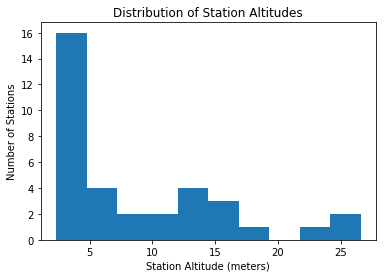

In [3]:
import matplotlib.pyplot as plt

plt.hist(altitudes)
plt.xlabel('Station Altitude (meters)')
plt.ylabel('Number of Stations')
plt.title('Distribution of Station Altitudes')
plt.show()

<h2>Number of Schools</h2>

The next contextual feature is the number of schools within walking distance of each station. Locations of schools in the city is available from [DataSF](https://data.sfgov.org/Economy-and-Community/Schools/tpp3-epx2). We will consider schools within a quarter mile of the station to be within walking distance.

In [4]:
school_coords = DataLoader.load_school_locations()
school_counts = GeographicMethods.count_within_distance(station_coords, school_coords, 0.25)
station_features['schools'] = pd.Series(school_counts, index = station_features.index)
station_features[:10]

,lat,long,alt,schools
id,,,,
41,37.795001,-122.399970,3.082564,1
42,37.797280,-122.398436,2.519689,1
45,37.794231,-122.402923,4.575804,5
46,37.795425,-122.404767,10.850125,13
47,37.788975,-122.403452,14.233555,1
48,37.799953,-122.398525,2.529956,1
49,37.790302,-122.390637,2.818376,4
50,37.795392,-122.394203,2.596962,1
51,37.791464,-122.391034,2.797034,4


Now the distribution for the number of schools:

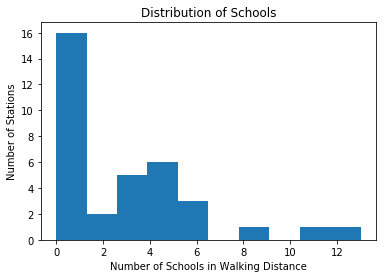

In [5]:
plt.hist(school_counts)
plt.xlabel('Number of Schools in Walking Distance')
plt.ylabel('Number of Stations')
plt.title('Distribution of Schools')
plt.show()

<h2>BART Stations</h2>

Next, the number of Bay Area Rapid Transit (BART) stations within walking distance of each station. Again, walking distance is a quarter mile. The locations of BART stations are available on [this Github](https://github.com/enjalot/bart/blob/master/data/bart_stations.csv).

In [6]:
bart_coords = DataLoader.load_bart_locations()
bart_counts = GeographicMethods.count_within_distance(station_coords, bart_coords, 0.25)
station_features['bart'] = pd.Series(bart_counts, index = station_features.index)
station_features[:10]

,lat,long,alt,schools,bart
id,,,,,
41,37.795001,-122.399970,3.082564,1,1
42,37.797280,-122.398436,2.519689,1,0
45,37.794231,-122.402923,4.575804,5,0
46,37.795425,-122.404767,10.850125,13,0
47,37.788975,-122.403452,14.233555,1,1
48,37.799953,-122.398525,2.529956,1,0
49,37.790302,-122.390637,2.818376,4,0
50,37.795392,-122.394203,2.596962,1,1
51,37.791464,-122.391034,2.797034,4,0


And a histogram for good measure:

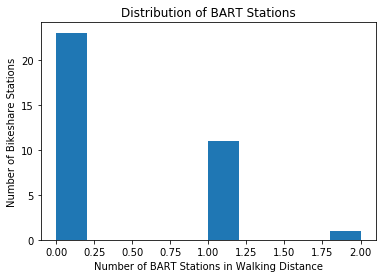

In [7]:
plt.hist(bart_counts)
plt.xlabel('Number of BART Stations in Walking Distance')
plt.ylabel('Number of Bikeshare Stations')
plt.title('Distribution of BART Stations')
plt.show()

<h2>Tourist Locations</h2>

Now the number of top-20 tourist attractions within walking distance of each station. We manually geo-coded the top attractions for San Francisco, listed by [San Francisco Travel](http://www.sftravel.com/article/top-20-attractions-san-francisco). Again, a tourist attraction is in walking distance of a station if it is at most a quarter mile away.

In [8]:
tour_coords = DataLoader.load_tourist_locations()
tour_counts = GeographicMethods.count_within_distance(station_coords, tour_coords, 0.25)
station_features['tour'] = pd.Series(tour_counts, index = station_features.index)
station_features[:10]

,lat,long,alt,schools,bart,tour
id,,,,,,
41,37.795001,-122.399970,3.082564,1,1,0
42,37.797280,-122.398436,2.519689,1,0,1
45,37.794231,-122.402923,4.575804,5,0,0
46,37.795425,-122.404767,10.850125,13,0,0
47,37.788975,-122.403452,14.233555,1,1,1
48,37.799953,-122.398525,2.529956,1,0,1
49,37.790302,-122.390637,2.818376,4,0,0
50,37.795392,-122.394203,2.596962,1,1,0
51,37.791464,-122.391034,2.797034,4,0,0


And yet another histogram:

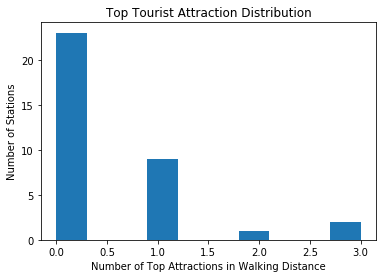

In [9]:
plt.hist(tour_counts)
plt.xlabel('Number of Top Attractions in Walking Distance')
plt.ylabel('Number of Stations')
plt.title('Top Tourist Attraction Distribution')
plt.show()

<h2>Zones</h2>

Finally, we track at each station if <i>at least one</i> zone of five dominant types (residential, commercial, industrial, public, and mixed use) is within walking distance of the station. San Francisco zoning data is availble from [SFData](https://data.sfgov.org/Geographic-Locations-and-Boundaries/Zoning-Districts/8br2-hhp3/data). 

Zones are defined by polygons, represented by a set of vertices. We say a zone is within walking distance of a station if <i>at least one vertex</i> is within a quarter-mile radius of the station.

We store information in two binary "incidence matrices" of sorts. Both matrices have a row corresponding to each zone. Columns of the walking_indicator matrix correspond to stations, and entries are 1 iff the corresponding zone-station pair are within walking distance. Columns of the gen_indicator matrix correspond to one of 5 general zone types, and entries are 1 iff the corresponding zone is that general zone type.

In [10]:
import numpy as np

# Load Zones
zones = DataLoader.load_zones()
nZones, nStations = len(zones), len(station_features)

# Create a map from general zone type to column
gen_types = ['Residential', 'Commercial', 'Industrial', 'Public', 'Mixed Use']
gen_cols = {gen : i for i, gen in enumerate(gen_types)}

# Prepare indicator arrays
walking_indicator = np.zeros((nZones, nStations))
gen_indicator = np.zeros((nZones, len(gen_types)))

# Wrap count_within_distance function
count_within_walking = lambda coords: \
    GeographicMethods.count_within_distance(station_coords, coords, 0.25)

for i, feature in enumerate(zones):
    
    # Determine which stations are in walking distance
    coords = feature['geometry']['coordinates'][0]
    coords = [(lat, long) for (long, lat) in coords]
    counts = np.array(count_within_walking(coords), dtype = 'int32')
    walking_indicator[i,] = counts >= 1
    
    # Determine general zone type
    zone_gen = feature['properties']['gen']
    gen_indicator[i, gen_cols[zone_gen]] = 1 

Multiplying the two incidence matrices tells us the number of zones of each type within walking distnace of each station:

In [11]:
n_zones = np.dot(walking_indicator.T, gen_indicator)

Now we can add 5 binary features to each station, indicating whether or not a zone of each major type is within walking distance of the station.

In [12]:
for i, gen in enumerate(gen_types):
    station_features[gen] = pd.Series(n_zones[:,i] >= 1, index = station_features.index)
station_features[:10]

,lat,long,alt,schools,bart,tour,Residential,Commercial,Industrial,Public,Mixed Use
id,,,,,,,,,,,
41,37.795001,-122.399970,3.082564,1,1,0,False,True,False,True,True
42,37.797280,-122.398436,2.519689,1,0,1,False,True,True,True,True
45,37.794231,-122.402923,4.575804,5,0,0,True,True,False,True,True
46,37.795425,-122.404767,10.850125,13,0,0,True,True,False,True,True
47,37.788975,-122.403452,14.233555,1,1,1,True,True,False,True,True
48,37.799953,-122.398525,2.529956,1,0,1,True,True,True,False,True
49,37.790302,-122.390637,2.818376,4,0,0,True,True,True,True,True
50,37.795392,-122.394203,2.596962,1,1,0,False,True,False,True,True
51,37.791464,-122.391034,2.797034,4,0,0,True,True,True,True,True


Printing the average of each column gives the fraction of stations who have a zone of the respective general types within walking distance.

In [13]:
print(station_features[gen_types].mean())

Residential    0.771429
Commercial     0.971429
Industrial     0.428571
Public         0.971429
Mixed Use      0.885714
dtype: float64


<h2>Income</h2>

The last piece of contextual data is per capita income at the census block containing each station. We manually assembled this data set, using the address of each station and US census records.

In [14]:
station_features['income'] = DataLoader.load_income_data()
station_features[:10]

,lat,long,alt,schools,bart,tour,Residential,Commercial,Industrial,Public,Mixed Use,income
id,,,,,,,,,,,,
41,37.795001,-122.399970,3.082564,1,1,0,False,True,False,True,True,103918
42,37.797280,-122.398436,2.519689,1,0,1,False,True,True,True,True,103918
45,37.794231,-122.402923,4.575804,5,0,0,True,True,False,True,True,18785
46,37.795425,-122.404767,10.850125,13,0,0,True,True,False,True,True,18785
47,37.788975,-122.403452,14.233555,1,1,1,True,True,False,True,True,34026
48,37.799953,-122.398525,2.529956,1,0,1,True,True,True,False,True,144451
49,37.790302,-122.390637,2.818376,4,0,0,True,True,True,True,True,189046
50,37.795392,-122.394203,2.596962,1,1,0,False,True,False,True,True,83131
51,37.791464,-122.391034,2.797034,4,0,0,True,True,True,True,True,189046


<h1>Building a Feature Set</h1>

Now we have a set of contextual data at each station: its <b>elevation</b>; the number of nearby <b>schools</b>, <b>BART stations</b>, and <b>top tourist attractions</b>; whether <b>zones</b> of each type are nearby; and the per capita <b>income</b> of the area.

But we are clustering on rides, not on stations.

<h2>Ride Data</h2>

Basic information about nearly 600,000 rides is available from [Kaggle](https://www.kaggle.com/benhamner/sf-bay-area-bike-share). This information includes the <b>day</b> and <b>time</b> of each ride, its <b>duration</b>, whether or not the rider is a <b>subscriber</b>, as well as the starting and ending station. We will load this information, and clean up the data set slightly.

In [15]:
ride_features  = DataLoader.load_ride_data()
ride_features[:10]

,isweekday,hour,duration,subscriber,source,dest
0,True,14,63,True,66,66
1,True,14,70,True,10,10
2,True,10,71,True,27,27
3,True,11,77,True,10,10
4,True,12,83,True,66,67
5,True,18,103,True,59,59
6,True,13,109,True,4,5
7,True,14,111,True,8,8
8,True,17,113,True,66,66
9,True,11,114,True,10,11


First, we are only interested in rides whose start and end stations are in San Francisco.

In [16]:
source_in_sf = ride_features.source.isin(station_features.index).values
dest_in_sf = ride_features.dest.isin(station_features.index).values
ride_features = ride_features[source_in_sf & dest_in_sf]
print(len(ride_features), 'rides remain!')

603693 rides remain!


Next, we eliminate rides in the upper 5% of duration, to eliminate ridiculous outliers.

In [17]:
cutoff = np.percentile(ride_features.duration.values, 95)
ride_features = ride_features[ride_features.duration <= cutoff]
print(len(ride_features), 'rides remain!')

573522 rides remain!


<h2>Adding Contextual Data</h2>

Now the fun part: merging the contextual data at each station with the ride features. First, we will calculate the change in altitude over each ride, and add that as a ride feature.

In [18]:
source_features = ride_features.merge(station_features, left_on = 'source', right_index = True)
dest_features = ride_features.merge(station_features, left_on = 'dest', right_index = True)
ride_features['dalt'] = dest_features.alt - source_features.alt
ride_features[:10]

,isweekday,hour,duration,subscriber,source,dest,dalt
0,True,14,63,True,66,66,0.000000
4,True,12,83,True,66,67,0.524129
5,True,18,103,True,59,59,0.000000
8,True,17,113,True,66,66,0.000000
10,True,13,125,True,49,54,-0.494290
13,True,13,130,True,64,64,0.000000
14,True,12,134,True,41,56,-0.025480
15,True,16,138,True,47,47,0.000000
17,True,12,142,True,67,67,0.000000
18,True,22,142,True,74,50,0.126980


Now we can add the counts of various things at the source and destination stations.

In [19]:
source_features, dest_features = station_features.copy(), station_features.copy()
source_features = source_features.drop(['lat', 'long'], 1)
dest_features = dest_features.drop(['lat', 'long'], 1)
source_features.columns = [col + '_src' for col in source_features.columns]
dest_features.columns = [col + '_dest' for col in dest_features.columns]
ride_features = ride_features.merge(source_features, left_on = 'source', right_index = True)
ride_features = ride_features.merge(dest_features, left_on = 'dest', right_index = True)
ride_features[:10]

,isweekday,hour,duration,subscriber,source,dest,dalt,alt_src,schools_src,bart_src,...,alt_dest,schools_dest,bart_dest,tour_dest,Residential_dest,Commercial_dest,Industrial_dest,Public_dest,Mixed Use_dest,income_dest
0,True,14,63,True,66,66,0.0,15.628606,6,0,...,15.628606,6,0,1,True,True,False,True,True,52225
8,True,17,113,True,66,66,0.0,15.628606,6,0,...,15.628606,6,0,1,True,True,False,True,True,52225
28,True,21,168,True,66,66,0.0,15.628606,6,0,...,15.628606,6,0,1,True,True,False,True,True,52225
79,True,14,262,True,66,66,0.0,15.628606,6,0,...,15.628606,6,0,1,True,True,False,True,True,52225
514,True,9,995,True,66,66,0.0,15.628606,6,0,...,15.628606,6,0,1,True,True,False,True,True,52225
643,True,12,1397,True,66,66,0.0,15.628606,6,0,...,15.628606,6,0,1,True,True,False,True,True,52225
757,True,19,134,True,66,66,0.0,15.628606,6,0,...,15.628606,6,0,1,True,True,False,True,True,52225
758,True,15,140,False,66,66,0.0,15.628606,6,0,...,15.628606,6,0,1,True,True,False,True,True,52225
765,True,14,182,False,66,66,0.0,15.628606,6,0,...,15.628606,6,0,1,True,True,False,True,True,52225
941,True,14,481,True,66,66,0.0,15.628606,6,0,...,15.628606,6,0,1,True,True,False,True,True,52225


<h2>Normalization</h2>

Now we have 25 features. Some are integers, some are binary, and some span large ranges of values. For better fit quality, we will normalize all of the features to the range 0 to 1.

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Normalize each feature vector between zero and 1
features = pd.DataFrame(MinMaxScaler().fit_transform(ride_features))
features.columns = ride_features.columns
features = features.drop(['source', 'dest'], 1)

<h1>Clustering</h1>

Finally, it is time to cluster the data. We use a Guassian Mixture Model (GMM), which defines clusters as modes of a mixture of a fixed number of multivariate Gaussian distributions. The fitting algorithm finds the means, covariance matrices, and weights for each component of the model, so as to maximize the model's likelihood for describing the given data.

GMM fitting is initialized with k-means clustering. From these initial clusters, the expectation-maximization algorithm brings the model to a local optimum. It is desirable to train several GMMs and select the best one.

In [21]:
from sklearn.mixture import GaussianMixture

# Clustering Settings
N_CLUSTERS = 3
N_MODELS = 10
MAX_ITER = 10000
SEED = 1

# Run several models
models, scores = [], []
for n in range(N_MODELS):
    print('Fitting model', n + 1)
    gmm = GaussianMixture(N_CLUSTERS, max_iter = MAX_ITER, random_state = SEED + n)
    models.append(gmm.fit(features))
    scores.append(models[n].score(features))
    
# Select the best model
best_idx = np.argmax(np.array(scores))
model = models[best_idx]
print('Selected model with average per-sample log likelihood', scores[best_idx])

Fitting model 1
Fitting model 2
Fitting model 3
Fitting model 4
Fitting model 5
Fitting model 6
Fitting model 7
Fitting model 8
Fitting model 9
Fitting model 10
Selected model with average per-sample log likelihood 30.6827632792


We can look at the cluster means to get a sense of the types of rides in each cluster.

In [22]:
centroid_df = pd.DataFrame(np.round(model.means_.T, 2), index = features.columns, columns = range(1, N_CLUSTERS + 1))
centroid_df

,1,2,3
isweekday,0.91,0.90,0.89
hour,0.60,0.56,0.56
duration,0.26,0.30,0.30
subscriber,0.89,0.90,0.87
dalt,0.50,0.45,0.51
alt_src,0.21,0.18,0.24
schools_src,0.11,0.20,0.20
bart_src,0.58,0.15,0.10
tour_src,0.27,0.09,0.11
Residential_src,0.39,0.80,0.86


In [23]:
# Sum weights on each edge
labels = model.predict_proba(features)
weights = np.zeros((nStations, nStations, N_CLUSTERS))
for i, source in enumerate(station_features.index):
    for j, dest in enumerate(station_features.index):
        has_this_edge = (ride_features['source'] == source) & (ride_features['dest'] == dest)
        weights[i,j,] = np.dot(has_this_edge, labels)

<h1>Clusters</h1>

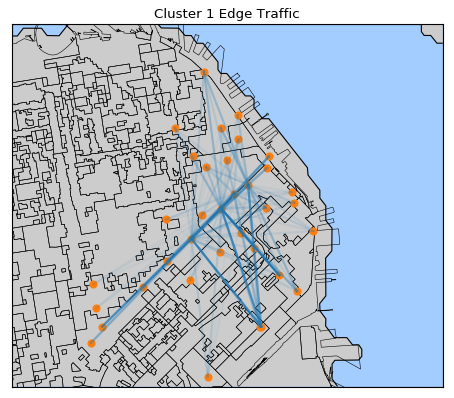

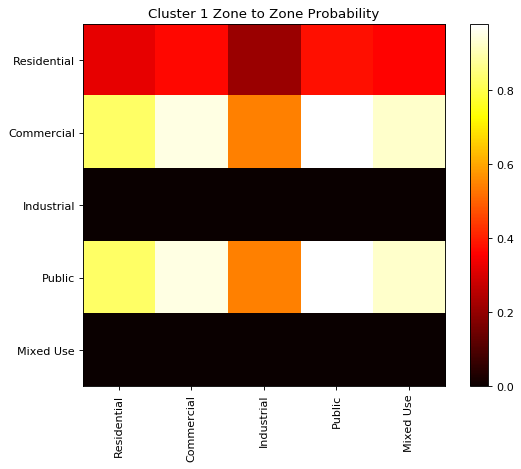

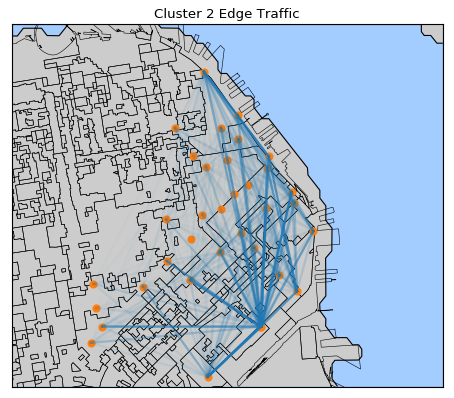

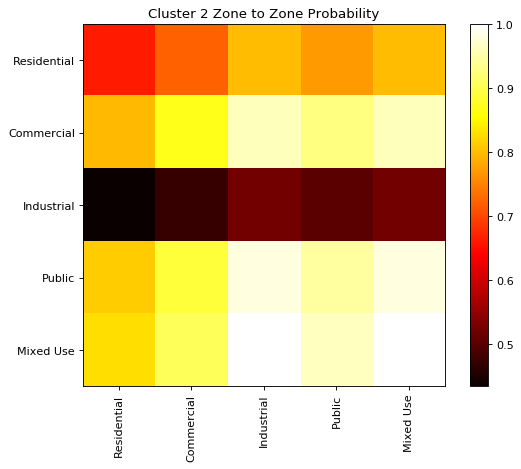

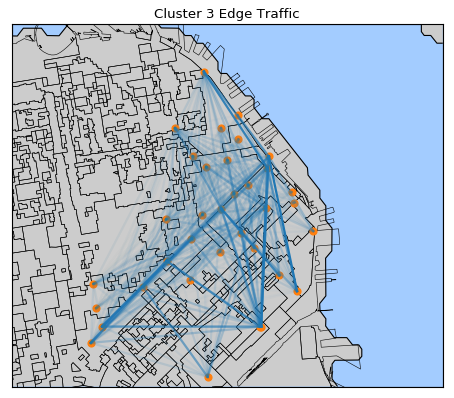

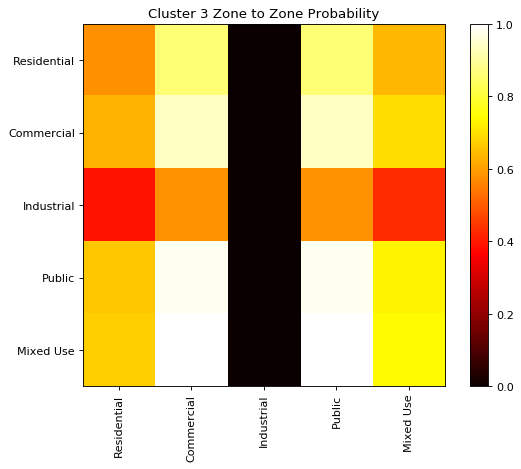

In [42]:
import Visualization

for k in range(N_CLUSTERS):

    # Show network map
    lats, longs = zip(*station_coords)
    Visualization.draw_network_on_basemap(longs, lats, weights[:,:,k])
    plt.title('Cluster ' + str(k + 1) + ' Edge Traffic')
    plt.show()

    # Show zone heatmap
    source_means = model.means_[:,9:14]
    dest_means = model.means_[:,19:24]
    x = np.outer(source_means[k, :], dest_means[k, :])
    Visualization.draw_source_dest_heatmap(x, gen_types)
    plt.title('Cluster ' + str(k + 1) + ' Zone to Zone Probability')
    plt.show()